In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
oly=pd.read_csv('athlete_events.csv')
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women 500 metres,NaN


In [3]:
oly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
oly.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
oly.shape

(271116, 15)

In [6]:
oly.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
for i in oly.columns:
    if oly[i].isnull().sum()>0:
        per=oly[i].isnull().sum()/len(oly)
        print(i,'is having ',np.round(per*100,2),'%','missing values')

Age is having  3.49 % missing values
Height is having  22.19 % missing values
Weight is having  23.19 % missing values
Medal is having  85.33 % missing values


In [8]:
# How many olympics games have been held?
oly['Games'].nunique()

51

In [9]:
# List down all Olympics games held so far?
 
oly_games=oly['Games'].unique()
oly_games 

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1988 Winter', '1992 Winter', '1994 Winter', '1932 Summer',
       '2002 Winter', '1952 Summer', '1980 Winter', '2000 Summer',
       '1996 Summer', '1912 Summer', '1924 Summer', '2014 Winter',
       '1948 Summer', '1998 Winter', '2006 Winter', '2008 Summer',
       '2016 Summer', '2004 Summer', '1960 Winter', '1964 Winter',
       '1984 Winter', '1984 Summer', '1968 Summer', '1972 Summer',
       '1988 Summer', '1936 Summer', '1952 Winter', '1956 Winter',
       '1956 Summer', '1960 Summer', '1928 Summer', '1976 Summer',
       '1980 Summer', '1964 Summer', '2010 Winter', '1968 Winter',
       '1906 Summer', '1972 Winter', '1976 Winter', '1924 Winter',
       '1904 Summer', '1928 Winter', '1908 Summer', '1948 Winter',
       '1932 Winter', '1936 Winter', '1896 Summer'], dtype=object)

In [10]:
oly2=pd.read_csv('noc_regions.csv')
df=pd.merge(oly,oly2,how='inner',on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women 200 metres Freestyle,NaN,China,NaN


In [11]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [12]:
# Mention the total no of nations who participated in each olympics game?
no_of_nations=df.groupby('Games')['region'].nunique()
print(len(no_of_nations))
print(no_of_nations.sort_values(ascending=False))

51
Games
2016 Summer    203
2012 Summer    202
2008 Summer    201
2004 Summer    199
2000 Summer    198
1996 Summer    195
1992 Summer    167
1988 Summer    155
1984 Summer    138
1972 Summer    119
1968 Summer    110
1964 Summer     93
1976 Summer     90
2014 Winter     88
1960 Summer     82
2010 Winter     81
1980 Summer     80
2006 Winter     78
2002 Winter     76
1998 Winter     72
1956 Summer     70
1994 Winter     67
1952 Summer     66
1992 Winter     64
1948 Summer     58
1988 Winter     56
1936 Summer     49
1984 Winter     48
1932 Summer     47
1928 Summer     46
1924 Summer     45
1968 Winter     36
1980 Winter     36
1964 Winter     36
1976 Winter     36
1972 Winter     34
1956 Winter     32
1900 Summer     31
1960 Winter     30
1952 Winter     30
1920 Summer     29
1912 Summer     28
1936 Winter     28
1948 Winter     28
1928 Winter     25
1908 Summer     22
1906 Summer     20
1924 Winter     19
1932 Winter     17
1904 Summer     14
1896 Summer     12
Name: region, dtype: i

In [13]:
# Which year saw the highest and lowest no of countries participating in olympics?
high_low=df.groupby(['Games'])['region'].nunique().sort_values(ascending=False) 
highest=high_low.head(1)
lowest=high_low.tail(1)
print('Highest no of countries is',highest,'and lowest no of countries is',lowest)

Highest no of countries is Games
2016 Summer    203
Name: region, dtype: int64 and lowest no of countries is Games
1896 Summer    12
Name: region, dtype: int64


In [14]:
# Which nation has participated in all of the olympic games?

nation=df.groupby(['region'])['Games'].nunique().sort_values(ascending=False).reset_index(name="No_of_games")
nation['ranking']=nation['No_of_games'].rank(method='dense',ascending=False)
nation[nation['ranking']==1][['region','No_of_games']]

,region,No_of_games
0,France,51
1,Italy,51
2,Switzerland,51
3,UK,51


In [15]:
# nation=df.groupby(['region'])['Games'].nunique().sort_values(ascending=False).reset_index(name="No_of_count")
#nation
# data=pd.DataFrame(nation)
# data['ranking']=data['No_of_count'].rank(method='dense',ascending=False)
# data[data['ranking']==1][['region','No_of_count']]

In [16]:
# Identify the sport which was played in all summer olympics?
summer_sport=df[df['Season']=='Summer']
sport_cnt=summer_sport.groupby(['Sport'])['Games'].nunique().sort_values(ascending=False).reset_index(name="No_of_count")
sport_cnt['ranking']=sport_cnt['No_of_count'].rank(method='dense',ascending=False)
sport_cnt[sport_cnt['ranking']==1][['Sport','No_of_count']]

,Sport,No_of_count
0,Gymnastics,29
1,Athletics,29
2,Cycling,29
3,Fencing,29
4,Swimming,29


In [17]:
# Which Sports were just played only once in the olympics?

only_one_sport=df.groupby(['Sport'])['Games'].nunique().sort_values(ascending=False).reset_index(name="No_of_count")
only_one_sport[only_one_sport['No_of_count']==1]

#only_one_game[only_one_game['No_of_count']==1][['Games','Sport','No_of_count']]

,Sport,No_of_count
56,Jeu De Paume,1
57,Cricket,1
58,Basque Pelota,1
59,Croquet,1
60,Rugby Sevens,1
61,Roque,1
62,Racquets,1
63,Motorboating,1
64,Military Ski Patrol,1
65,Aeronautics,1


In [18]:
#only_one_sport=df.groupby(['Sport'])['Games'].nunique().sort_values(ascending=False).reset_index(name="No_of_count")
unique_sport=df.groupby('Sport')['Games'].nunique().sort_values(ascending=True).reset_index(name='No_of_count')
unique_game=df[['Games','Sport']].drop_duplicates()
df1=pd.merge(unique_game,unique_sport,on='Sport',how='inner')
only_one_game=df1[df1['No_of_count']==1][['Games','Sport','No_of_count']]
only_one_game.sort_values(by='Games')

,Games,Sport,No_of_count
897,1900 Summer,Cricket,1
898,1900 Summer,Croquet,1
900,1900 Summer,Basque Pelota,1
888,1904 Summer,Roque,1
895,1908 Summer,Jeu De Paume,1
899,1908 Summer,Motorboating,1
905,1908 Summer,Racquets,1
896,1924 Winter,Military Ski Patrol,1
904,1936 Summer,Aeronautics,1
873,2016 Summer,Rugby Sevens,1


In [19]:
 # Fetch the total no of sports played in each olympic games?
no_of_games=df.groupby('Games')['Sport'].nunique().sort_values(ascending=True).reset_index(name='No_of_count')
no_of_games.sort_values(by='No_of_count',ascending=False)

,Games,No_of_count
50,2016 Summer,34
49,2008 Summer,34
48,2004 Summer,34
47,2000 Summer,34
46,2012 Summer,32
45,1996 Summer,31
44,1992 Summer,29
43,1988 Summer,27
42,1984 Summer,25
41,1920 Summer,25


In [20]:
# Fetch oldest athletes to win a gold medal?
df1=df[df['Medal']=='Gold'] 
df1['ranking']=df1['Age'].rank(method='dense',ascending=False)
df1[df1['ranking']==1] 

C:\Users\SOMANTH KUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,ranking
22547,53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men Singles,Gold,USA,NaN,1.0
197667,117046,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men Running Target, Single Shot, Team",Gold,Sweden,NaN,1.0


In [21]:
# Find the Ratio of male and female athletes participated in all olympic games?
male_count = df[df['Sex'] == 'M'].shape[0]
female_count = df[df['Sex'] == 'F'].shape[0]

ratio_male_to_female = male_count / female_count
ratio_female_to_male = female_count / male_count

print('Ratio of male to female :', np.round(ratio_male_to_female,2))
print('Ratio of female to male :', np.round(ratio_female_to_male,2))

Ratio of male to female : 2.64
Ratio of female to male : 0.38


In [22]:
flt=[]
other=[]
obj=[]
for col in df.columns:
    if df[col].dtypes=='float':
        flt.append(col)
    elif df[col].dtypes=='object':
        obj.append(col)
    else:
        other.append(col)    
print(flt)
print(obj)
print(other)

['Age', 'Height', 'Weight']
['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes']
['ID', 'Year']


In [23]:
df.Season.value_counts()

Summer    222203
Winter     48564
Name: Season, dtype: int64

In [24]:
value_1=df[df['Season']=='Summer']['Games'].reset_index(name='Summer_games')
value_1

,index,Summer_games
0,0,1992 Summer
1,1,2012 Summer
2,2,2000 Summer
3,3,2004 Summer
4,4,2016 Summer
...,...,...
222198,270762,2008 Summer
222199,270763,2012 Summer
222200,270764,1996 Summer
222201,270765,1984 Summer


In [25]:
value_2=df[df['Season']=='Winter']['Games'].reset_index(name='Winter_games')
value_2

,index,Winter_games
0,6,2006 Winter
1,7,2006 Winter
2,8,1998 Winter
3,9,1998 Winter
4,10,1998 Winter
...,...,...
48559,270167,2010 Winter
48560,270168,2010 Winter
48561,270209,1992 Winter
48562,270210,1992 Winter


In [26]:
value_cnt=pd.DataFrame({'Summer':[value_1],'Winter':[value_2]},index=None)
for col in value_cnt.columns:
    print(col)

Summer
Winter


In [27]:
dff=pd.concat([value_1,value_2],axis=1)
#dff.drop(columns='index',inplace=True)
dff

,index,Summer_games,index,Winter_games
0,0,1992 Summer,6.0,2006 Winter
1,1,2012 Summer,7.0,2006 Winter
2,2,2000 Summer,8.0,1998 Winter
3,3,2004 Summer,9.0,1998 Winter
4,4,2016 Summer,10.0,1998 Winter
...,...,...,...,...
222198,270762,2008 Summer,NaN,NaN
222199,270763,2012 Summer,NaN,NaN
222200,270764,1996 Summer,NaN,NaN
222201,270765,1984 Summer,NaN,NaN


In [28]:
value_3=df[df['Season']=='Winter']['Games'].reset_index()
value_3

,index,Games
0,6,2006 Winter
1,7,2006 Winter
2,8,1998 Winter
3,9,1998 Winter
4,10,1998 Winter
...,...,...
48559,270167,2010 Winter
48560,270168,2010 Winter
48561,270209,1992 Winter
48562,270210,1992 Winter


In [29]:
value_3=df[df['Season']=='Winter']['Games']
value_3

6         2006 Winter
7         2006 Winter
8         1998 Winter
9         1998 Winter
10        1998 Winter
             ...     
270167    2010 Winter
270168    2010 Winter
270209    1992 Winter
270210    1992 Winter
270211    1992 Winter
Name: Games, Length: 48564, dtype: object

In [30]:
# Fetch the top 5 athletes who have won the most gold medals?
gold=df[df['Medal']=='Gold']
top_athlets=gold.groupby(['Name','Team'])['Medal'].count().sort_values(ascending=False).reset_index(name='No_of_gold')
top_athlets['ranking']=top_athlets['No_of_gold'].rank(method='dense',ascending=False)
top_athlets=top_athlets[top_athlets['ranking']<=5][['Name','Team','No_of_gold']].drop_duplicates().sort_values(by='No_of_gold',ascending=False).reset_index()
top_athlets.drop(columns='index')

,Name,Team,No_of_gold
0,"Michael Fred Phelps, II",United States,23
1,"Raymond Clarence ""Ray"" Ewry",United States,10
2,"Frederick Carlton ""Carl"" Lewis",United States,9
3,Larysa Semenivna Latynina (Diriy-),Soviet Union,9
4,Mark Andrew Spitz,United States,9
5,Paavo Johannes Nurmi,Finland,9
6,Usain St. Leo Bolt,Jamaica,8
7,Ole Einar Bjrndalen,Norway,8
8,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",United States,8
9,"Matthew Nicholas ""Matt"" Biondi",United States,8


In [31]:
# Fetch the top 5 athletes who have won the most medals (gold/silver/bronze)?
top_athlets=df.groupby(['Name','Team'])['Medal'].value_counts().sort_values(ascending=False).reset_index(name='No_of_medals')
top_athlets=top_athlets.groupby(['Name','Team'])['No_of_medals'].sum().sort_values(ascending=False).reset_index(name='No_of_gold_bron_silv')
top_athlets['ranking']=top_athlets['No_of_gold_bron_silv'].rank(method='dense',ascending=False)
top_athlets=top_athlets[top_athlets['ranking']<=5][['Name','Team','No_of_gold_bron_silv']].drop_duplicates().sort_values(by='No_of_gold_bron_silv',ascending=False).reset_index()
top_athlets.drop(columns='index')


,Name,Team,No_of_gold_bron_silv
0,"Michael Fred Phelps, II",United States,28
1,Larysa Semenivna Latynina (Diriy-),Soviet Union,18
2,Nikolay Yefimovich Andrianov,Soviet Union,15
3,Takashi Ono,Japan,13
4,Edoardo Mangiarotti,Italy,13
5,Ole Einar Bjrndalen,Norway,13
6,Borys Anfiyanovych Shakhlin,Soviet Union,13
7,Natalie Anne Coughlin (-Hall),United States,12
8,Ryan Steven Lochte,United States,12
9,Aleksey Yuryevich Nemov,Russia,12


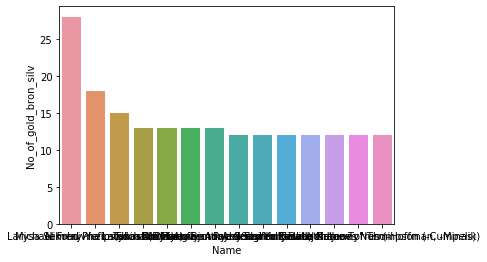

In [32]:
sns.barplot(x='Name',y='No_of_gold_bron_silv',data=top_athlets)
plt.show()

In [33]:
# Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won?
top_nation=df.groupby('region')['Medal'].count().reset_index(name='No_of_medals')
top_nation['ranking']=top_nation['No_of_medals'].rank(method='dense',ascending=False)
top_5_nation=top_nation[top_nation['ranking']<=5].sort_values(by='No_of_medals',ascending=False).drop_duplicates()
top_5_nation

,region,No_of_medals,ranking
191,USA,5637,1.0
151,Russia,3947,2.0
67,Germany,3756,3.0
190,UK,2068,4.0
63,France,1777,5.0


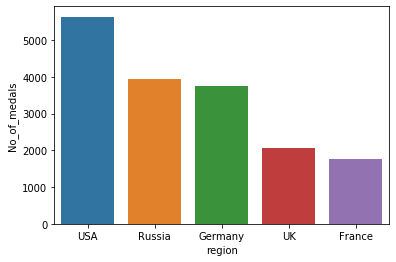

In [34]:
sns.barplot(x='region',y='No_of_medals',data=top_5_nation)
plt.show()

In [35]:
# List down total gold, silver and broze medals won by each country?
country_medal=pd.crosstab(index=df['region'],columns=df['Medal'])
country_medal.sort_values(by='Gold',ascending=False)

Medal,Bronze,Gold,Silver
region,,,
USA,1358,2638,1641
Russia,1178,1599,1170
Germany,1260,1301,1195
UK,651,678,739
Italy,531,575,531
...,...,...,...
Niger,1,0,1
Paraguay,0,0,17
Philippines,7,0,3


In [36]:
#medal=df.groupby(['region','Medal'])['Medal'].count().reset_index(name='medal')
# medal_gold=df[df['Medal']=='Gold']
# medal_gold=medal_gold.groupby(['region'])['Medal'].count().reset_index(name='gold')
# medal_bronz=df[df['Medal']=='Bronze']
# medal_bronz=medal_bronz.groupby(['region'])['Medal'].count().reset_index(name='bronz')
# #pd.crosstab(index=['region'],columns=df['Medal'])
# medal_silver=df[df['Medal']=='Silver']
# medal_silver=medal_silver.groupby(['region'])['Medal'].count().reset_index(name='silver')
# #pd.crosstab(index=['region'],columns=df['Medal'])
# medal_silver

In [37]:
#List down total gold, silver and broze medals won by each country corresponding to each olympic games?
olympics_medal=pd.crosstab(index=[df['Games'],df['region']],columns=df['Medal'])
olympics_medal.sort_values(by='Gold',ascending=False)

Medal                    Bronze  Gold  Silver
Games       region                           
1980 Summer Russia          126   187     129
1984 Summer USA              50   186     116
1996 Summer USA              52   159      48
1908 Summer UK               90   147     131
2012 Summer USA              46   145      57
...                         ...   ...     ...
1972 Summer Ethiopia          2     0       0
            Pakistan          0     0      15
            Lebanon           0     0       1
            South Korea       0     0       1
1984 Summer Egypt             0     0       1

[1640 rows x 3 columns]

In [38]:
# Identify which country won the most gold, most silver and most bronze medals in each olympic games?
df_gold=df[df['Medal']=='Gold']
df2=df_gold.groupby(['Games','region'])['Medal'].count().sort_values(ascending=False).reset_index(name='medals')
df2['region_medal_gold']=df2['region']+'-'+df2['medals'].astype(str)
df2=df2[['Games','region_medal_gold']] 
get_value_gold = lambda x: x.iloc[0]['region_medal_gold']
result_gold = df2.groupby('Games').apply(get_value_gold).reset_index(name='gold')
result_gold

df_bronz=df[df['Medal']=='Bronze']
df2=df_bronz.groupby(['Games','region'])['Medal'].count().sort_values(ascending=False).reset_index(name='medals')
df2['region_medal_bronz']=df2['region']+'-'+df2['medals'].astype(str) 
df2=df2[['Games','region_medal_bronz']] 
get_value_bronz = lambda x: x.iloc[0]['region_medal_bronz']
result_bronz = df2.groupby('Games').apply(get_value_bronz).reset_index(name='bronz')
# result_bronz
result_bronz

df_silver=df[df['Medal']=='Silver']
df2=df_silver.groupby(['Games','region'])['Medal'].count().sort_values(ascending=False).reset_index(name='medals')
df2['region_medal_silver']=df2['region']+'-'+df2['medals'].astype(str) 
df2=df2[['Games','region_medal_silver']] 
get_value_silver = lambda x: x.iloc[0]['region_medal_silver']
result_silver = df2.groupby('Games').apply(get_value_silver).reset_index(name='silver')
# result_bronz
result_silver

game_medal=pd.merge(pd.merge(result_gold,result_bronz,on='Games'),result_silver,on='Games')
game_medal

,Games,gold,bronz,silver
0,1896 Summer,Germany-25,Greece-20,Greece-18
1,1900 Summer,UK-59,France-82,France-101
2,1904 Summer,USA-128,USA-125,USA-141
3,1906 Summer,Greece-24,Greece-30,Greece-48
4,1908 Summer,UK-147,UK-90,UK-131
5,1912 Summer,Sweden-103,UK-59,UK-64
6,1920 Summer,USA-111,Belgium-66,France-71
7,1924 Summer,USA-97,USA-49,France-51
8,1924 Winter,UK-16,UK-11,USA-10
9,1928 Summer,USA-47,Germany-41,Netherlands-29


In [39]:
 # Which countries have never won gold medal but have won silver/bronze medals? 
dff=pd.crosstab(index=df['region'],columns=df['Medal'])
dfg=dff[dff['Gold']==0]
gbs=dfg.sort_values(by=['Bronze','Silver'],ascending=False)
print(len(gbs))
gbs

37


Medal,Bronze,Gold,Silver
region,,,
Ghana,22,0,1
Philippines,7,0,3
Malaysia,5,0,11
Moldova,5,0,3
Saudi Arabia,5,0,1
Qatar,4,0,1
Iceland,2,0,15
Lebanon,2,0,2
Kyrgyzstan,2,0,1


In [40]:
# In which Sport/event, India has won highest medals?
medal=df[df['region']=='India'].drop_duplicates()
max_medal=medal.groupby(['region','Sport'])['Medal'].count().sort_values(ascending=False).reset_index(name='cnt')
max_medal['ranking']=max_medal['cnt'].rank(method='dense',ascending=False).sort_values(ascending=False)
max_medal_1=max_medal[max_medal['ranking']==1]
max_medal_1

,region,Sport,cnt,ranking
0,India,Hockey,173,1.0


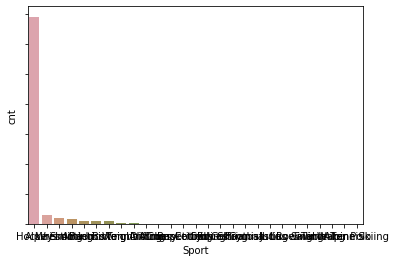

In [41]:
rank=sns.barplot(x=max_medal['Sport'],y=max_medal['cnt'],data=max_medal,saturation=0.5,ci=None)
rank.set_yticklabels(rank.get_yticklabels(), rotation=0)
plt.show()

In [42]:
# Break down all olympic games where india won medal for Hockey and how many medals in each olympic games.
hockey_medal=df[(df['region']=='India') &(df['Sport']=='Hockey')].drop_duplicates()
games_medal=hockey_medal.groupby(['region','Games','Sport'])['Medal'].count().sort_values(ascending=False).reset_index(name='cnt')
games_medal[games_medal['cnt']>0]

,region,Games,Sport,cnt
0,India,1948 Summer,Hockey,20
1,India,1936 Summer,Hockey,19
2,India,1956 Summer,Hockey,17
3,India,1968 Summer,Hockey,16
4,India,1980 Summer,Hockey,16
5,India,1932 Summer,Hockey,15
6,India,1964 Summer,Hockey,15
7,India,1972 Summer,Hockey,14
8,India,1952 Summer,Hockey,14
9,India,1928 Summer,Hockey,14


In [63]:
lst=[]
for col in df.columns:
    gold=pd.crosstab(index=df['region'],columns=df['Medal'])
    gold=gold[gold["Gold"]>=500].drop_duplicates()
lst.append(gold)
print(lst)

[Medal    Bronze  Gold  Silver
region                       
France      666   501     610
Germany    1260  1301    1195
Italy       531   575     531
Russia     1178  1599    1170
UK          651   678     739
USA        1358  2638    1641]


In [44]:
dfx = pd.DataFrame({
   'Date': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02'],
   'Product': ['A', 'B', 'A', 'B'],
   'Sales': [100, 200, 150, 300],
   'Cost': [50, 100, 75, 150]
})

# create a pivot table
pivot = dfx.pivot_table(values='Sales', index='Date', columns='Product',aggfunc='sum',margins=True)

print(pivot)

### parameters in pivot table (default)
# values=None,
# index=None,
# columns=None,
# aggfunc='mean',
# fill_value=None,
# margins=False,
# dropna=True,
# margins_name='All',
# observed=False,

Product       A    B  All
Date                     
2022-01-01  100  200  300
2022-01-02  150  300  450
All         250  500  750


In [64]:
dfz = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35]
})

# use apply() with a lambda function to create a new column
dfz['age_squared'] = dfz['age'].apply(lambda x: x ** 2)

# print the updated DataFrame
print(dfz)

      name  age  age_squared
0    Alice   25          625
1      Bob   30          900
2  Charlie   35         1225


In [45]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [57]:
for col in df.columns:
    if df[col].dtypes=='float':
        summary_stats = df.agg({col: ['min', 'max', 'mean', lambda x: x.quantile(0.75) - x.quantile(0.25)]})

    # print the summary statistics
        print(np.round(summary_stats,2))

            Age
min       10.00
max       97.00
mean      25.56
<lambda>   7.00
          Height
min       127.00
max       226.00
mean      175.34
<lambda>   15.00
          Weight
min        25.00
max       214.00
mean       70.71
<lambda>   19.00


In [65]:
import pandas as pd

# create a DataFrame
dfg = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35],
    'gender': ['F', 'M', 'M']
})

# create an empty dictionary
data_dict = {}

# append columns to the dictionary
for col in dfg.columns:
    data_dict[col] = dfg[col].tolist()

# print the resulting dictionary
print(data_dict)


{'name': ['Alice', 'Bob', 'Charlie'], 'age': [25, 30, 35], 'gender': ['F', 'M', 'M']}


In [66]:
'''Note that slicing in pandas can be inclusive or exclusive, 
depending on the indexing method used. With label-based indexing (using loc), 
the slice is inclusive of the endpoints. With integer-based indexing (using iloc), 
the slice is exclusive of the endpoint for the end index.'''

'Note that slicing in pandas can be inclusive or exclusive, \ndepending on the indexing method used. With label-based indexing (using loc), \nthe slice is inclusive of the endpoints. With integer-based indexing (using iloc), \nthe slice is exclusive of the endpoint for the end index.'

In [69]:
# when we dont know column name and row name we use 'iloc' and when we :: it means we are skipping rows or columns.
#df.loc[start_row_index:end_row_index,start_col_index:end_col_index]
df.iloc[:5,:3]

,ID,Name,Sex
0,1,A Dijiang,M
1,2,A Lamusi,M
2,602,Abudoureheman,M
3,1463,Ai Linuer,M
4,1464,Ai Yanhan,F


In [89]:
df.iloc[::2,::4]
#selecting from first row to last row and skipping 2 rows in between and selecting all columns and skipping 4 inbetween.

,ID,Height,Games,Sport,notes
0,1,180.0,1992 Summer,Basketball,NaN
2,602,182.0,2000 Summer,Boxing,NaN
4,1464,168.0,2016 Summer,Swimming,NaN
6,3605,178.0,2006 Winter,Speed Skating,NaN
8,3610,173.0,1998 Winter,Short Track Speed Skating,NaN
...,...,...,...,...,...
270758,116595,NaN,2016 Summer,Boxing,NaN
270760,119487,170.0,2000 Summer,Taekwondo,NaN
270762,120575,150.0,2008 Summer,Athletics,NaN
270764,122166,NaN,1996 Summer,Athletics,NaN


In [91]:
# when we know the column name and row name we use 'loc' and when we :: it means we are skipping as many rows or columns.
#df.loc[start_row:end_row,start_col:end_col]
df.loc[1:10,'Games':'City']

,Games,Year,Season,City
1,2012 Summer,2012,Summer,London
2,2000 Summer,2000,Summer,Sydney
3,2004 Summer,2004,Summer,Athina
4,2016 Summer,2016,Summer,Rio de Janeiro
5,2016 Summer,2016,Summer,Rio de Janeiro
6,2006 Winter,2006,Winter,Torino
7,2006 Winter,2006,Winter,Torino
8,1998 Winter,1998,Winter,Nagano
9,1998 Winter,1998,Winter,Nagano
10,1998 Winter,1998,Winter,Nagano


In [95]:
df.loc[1:20:5,:'Games']
#selecting from first row to 20th row and skipping 5 rows and from starting to till Games col.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter
11,3610,An Yulong,M,23.0,173.0,70.0,China,CHN,2002 Winter
16,6376,Ba Dexin,M,23.0,185.0,80.0,China,CHN,2014 Winter
